# RUL Forecasting 

Metode:

- model: SVR dengan kernel polinomial
- data smoothing menggunakan library tsmoothie

In [ ]:
!pip install tsmoothie

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Vibrasi Bearing 3.xlsx.csv to Data Vibrasi Bearing 3.xlsx.csv


In [ ]:
import sys
import numpy as np
import pandas as pd
import joblib
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
from tsmoothie.smoother import LowessSmoother

sc_X = StandardScaler()
sc_y = StandardScaler()


In [ ]:
def get_data():
    df = pd.read_csv("Data Vibrasi Bearing 3.xlsx.csv")
    column_target = "Eng Brg 3X Vibration"
    df = df[column_target]
    return df

0        17.500
1        17.300
2        17.000
3        17.300
4        16.500
          ...  
17515     0.508
17516     0.508
17517     0.508
17518     0.508
17519     2.030
Name: Eng Brg 3X Vibration, Length: 17520, dtype: float64


Text(0, 0.5, 'Vibrasi ($\\mu$m)')

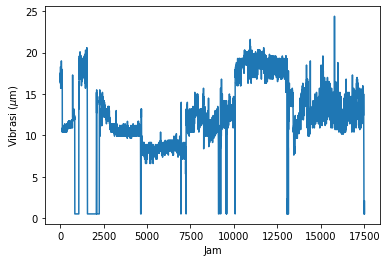

In [ ]:
data = get_data()
print(data)
plt
plt.plot(data)
plt.xlabel("Jam")
plt.ylabel("Vibrasi ($\mu$m)")

4713      9.65
4714      9.40
4715      9.14
4716      9.40
4717      9.14
         ...  
10942    21.30
10943    20.80
10944    21.10
10945    20.80
10946    20.60
Name: Eng Brg 3X Vibration, Length: 6234, dtype: float64


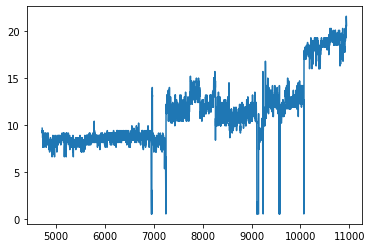

In [ ]:
data = data[4713:10947]
print(data)
plt.plot(data)

In [ ]:
extracted = data[data > 7]

In [ ]:
#plt.scatter([i for i in range(len(extracted))], extracted)

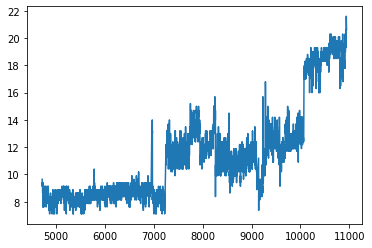

In [ ]:
extracted
plt.plot(extracted)

In [ ]:
import pandas as pd

df = pd.DataFrame({"data": extracted.to_numpy()})
df.to_csv("bearing-3-extracted.csv", index=False)

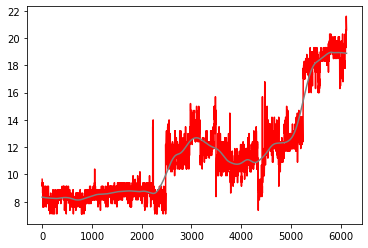

In [ ]:
from tsmoothie.smoother import DecomposeSmoother, LowessSmoother

smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)

df = pd.read_csv("bearing-3-extracted.csv")
smoother.smooth(df)

plt.plot(df, label="data", c="red")
plt.plot(smoother.smooth_data[0], label="Extracted", c="grey")

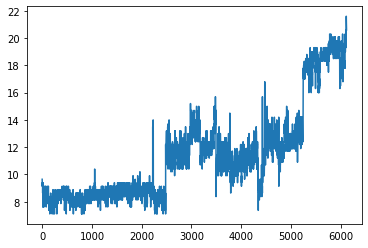

In [ ]:
plt.plot(df["data"])

In [ ]:
from sklearn.metrics import make_scorer

neg_mean_squared_error_scorer = make_scorer(metrics.mean_squared_error,
                                        greater_is_better=False)
import numpy as np

y = smoother.smooth_data[0]
x = np.array([[i] for i in range(len(y))])

tuned_parameters = [{'kernel': ['poly'],'C': [0.1, 1, 10, 100, 1000], 'epsilon': [0.001, 0.01, 0.1, 1], 'degree': [2, 3, 4, 5]} ]

clf = GridSearchCV(
        SVR(),
        tuned_parameters,
        scoring=neg_mean_squared_error_scorer,
        verbose = True,
        n_jobs=-1,
)    

clf.fit(x, y)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 64.0min


In [ ]:
import numpy as np

y = smoother.smooth_data[0]
x = np.array([[i] for i in range(len(y))])

clf = SVR(kernel='rbf', C = 10, epsilon= 0.001 )
clf.fit(x, y)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Streaming output truncated to the last 5000 lines.
[16.79085748]
[16.79631461]
[16.80158171]
[16.80665816]
[16.81154335]
[16.81623668]
[16.82073757]
[16.82504543]
[16.82915969]
[16.8330798]
[16.83680518]
[16.84033531]
[16.84366964]
[16.84680765]
[16.84974883]
[16.85249265]
[16.85503862]
[16.85738626]
[16.85953509]
[16.86148462]
[16.8632344]
[16.86478399]
[16.86613292]
[16.86728078]
[16.86822714]
[16.86897158]
[16.8695137]
[16.8698531]
[16.8699894]
[16.86992222]
[16.8696512]
[16.86917598]
[16.86849621]
[16.86761156]
[16.8665217]
[16.86522631]
[16.86372509]
[16.86201773]
[16.86010395]
[16.85798348]
[16.85565605]
[16.85312139]
[16.85037926]
[16.84742942]
[16.84427165]
[16.84090573]
[16.83733144]
[16.8335486]
[16.82955702]
[16.82535652]
[16.82094692]
[16.81632809]
[16.81149986]
[16.80646211]
[16.8012147]
[16.79575752]
[16.79009047]
[16.78421344]
[16.77812637]
[16.77182916]
[16.76532175]
[16.7586041]
[16.75167615]
[16.74453788]
[16.73718925]
[16.72963026]
[16.7218609]
[16.71388119]
[16.7056

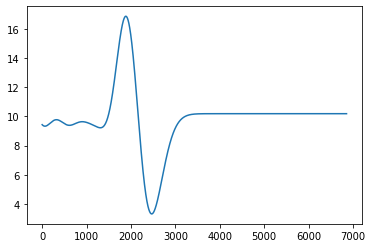

In [ ]:
TH = 63

x_test = [[i] for i in range(0, len(y)+5000)]
out = clf.predict(x_test)

i = 0


for i in x_test:
    t = clf.predict([i])
    print(t)
    
    if t > 63 and t < 64 :
        x_mark = i
        y_mark = t
plt.plot(out)
        


In [ ]:
RUL_X = [i for i in range(len(x)+5000)]
RUL_Y = [max(y) for i in range(len(y)+5000)]

EOL_Y = np.linspace(0, TH, 1000)
EOL_X = [max(x) for i in range(1000)]

TH_Y = [y_mark for i in range(len(y)+5000)]

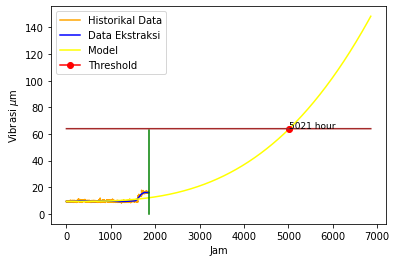

In [ ]:
plt.plot(df, label="Historikal Data", c="orange")
plt.plot(smoother.smooth_data[0], label="Data Ekstraksi", c="blue")
plt.plot(x_test, out, label="Model", c="yellow")
plt.plot(x_mark, y_mark, marker="o", c="red", label="Threshold")
plt.plot(EOL_X, EOL_Y, c="green")
plt.plot(RUL_X, TH_Y, c="brown")
plt.text(x_mark[0]+0.8, y_mark[0]+.08, f"{x_mark[0]} hour", fontsize=9)
plt.xlabel("Jam")
plt.ylabel("Vibrasi $\mu$m")
plt.legend()
plt.show()

In [ ]:
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
y = smoother.smooth_data[0]
x = np.array([[i] for i in range(len(y))])

out = clf.predict(x)
regression_results(y, out)

explained_variance:  0.4894
mean_squared_log_error:  0.0102
r2:  0.4724
MAE:  0.7865
MSE:  1.9755
RMSE:  1.4055
